# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Feature engineering - For Visualization Purposes

In [3]:
# Add a feature that counts the number of toxicity labels
categories = np.array(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"])
df['num_toxicity_labels'] = df[categories].sum(axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_toxicity_labels
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [4]:
# Add a feature column showing if the comment is clean
np.append(categories, "clean")
df['clean'] = df["num_toxicity_labels"].apply(lambda x: 1 if x == 0 else 0)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_toxicity_labels,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,1
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,1
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0,1


In [5]:
# Add a feature column of the length of the comment
df["comment_length"] = df["comment_text"].apply(lambda x: len(x))
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_toxicity_labels,clean,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,1,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,1,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,1,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0,1,70


# Data Analysis

## Length

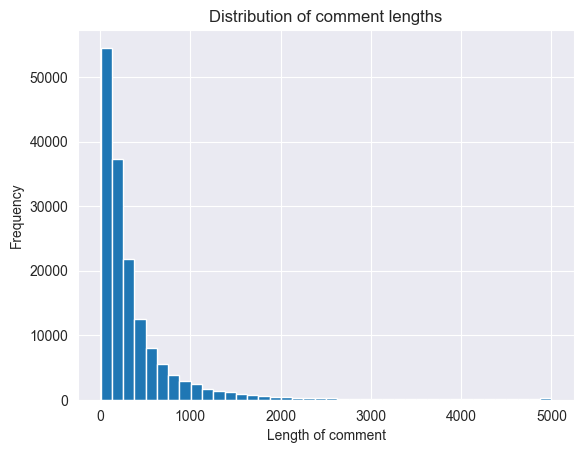

In [6]:
plt.hist(df["comment_length"], bins=40)
plt.xlabel("Length of comment")
plt.ylabel("Frequency")
plt.title("Distribution of comment lengths")
plt.show()

## Label Distribution

/var/folders/8v/3hj81gys6dgdw401b74kwjrr0000gn/T/ipykernel_77424/388581258.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencies = frequencies[sorted_indicies]


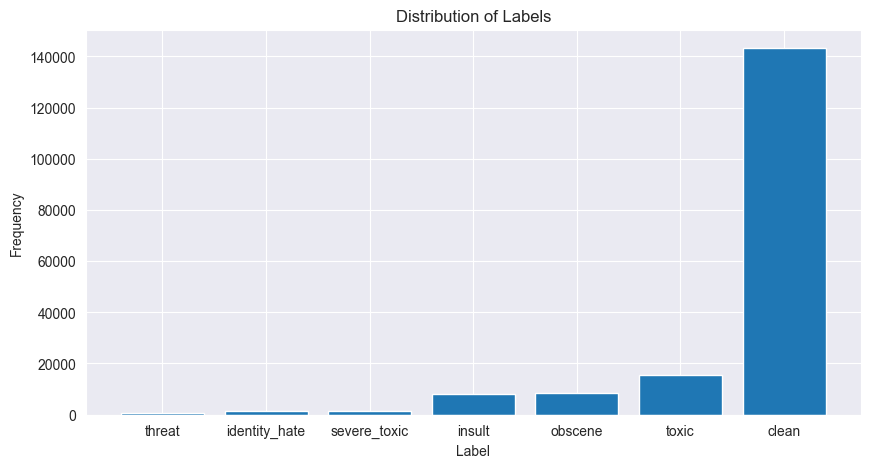

In [7]:
# Sorted label distribution
categories = np.array(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "clean"])
frequencies = df[categories].sum()

sorted_indicies = np.argsort(frequencies)
frequencies = frequencies[sorted_indicies]
categories = categories[sorted_indicies]

plt.figure(figsize=(10, 5))
plt.bar(categories, frequencies)
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Distribution of Labels")
plt.show()

## Correlation Matrix

<Axes: >

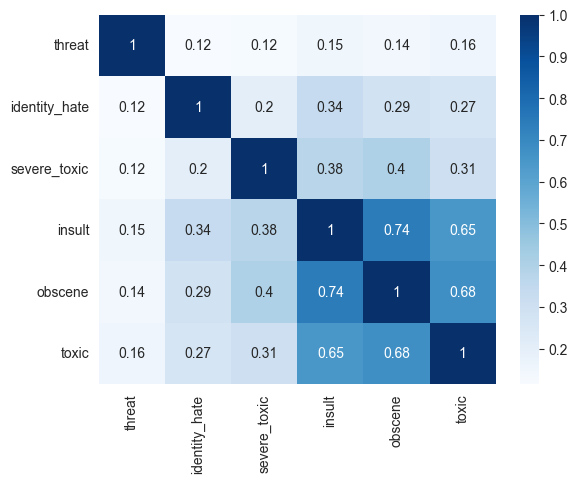

In [8]:
cor_matrix = df[categories[:-1]].corr()

sn.heatmap(cor_matrix, cmap="Blues", annot=True)

# Data Preprocessing

## Outlier Removal

Upper bound: 1355.0


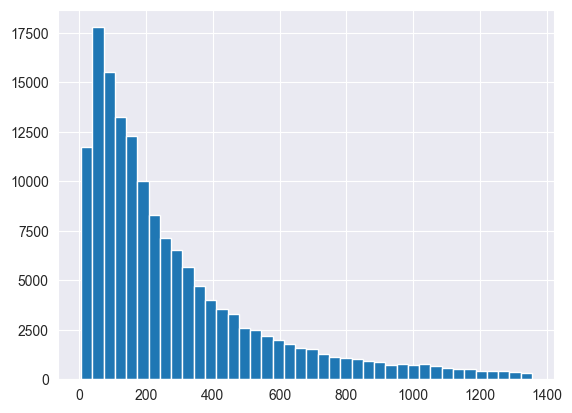

In [9]:
# Selected 95th percentile of comment lengths
upper_bound = df["comment_length"].quantile(0.95)
print(f"Upper bound: {upper_bound}")
df = df[(df["comment_length"] <= upper_bound) & (df["comment_length"] >= 5)]
df = df.dropna()
plt.hist(df["comment_length"], bins=40)
plt.show()

## Data Rebalancing

In [10]:
# from googletrans import Translator
# from tqdm.asyncio import tqdm
# 
# languages = ["fr", "es", "en"]
# translator = Translator()
# 
# async def multi_step_back_trans(source_text: str, target_languages: []) -> str:
#     """Back-translates the source text using multiple translation steps"""
#     augmented_text = source_text
#     for lan in target_languages:
#         augmented_text = await translator.translate(augmented_text, dest=lan)
#         augmented_text = augmented_text.text
#     return augmented_text
# 
# # Select data to resample
# selected_labels = ["threat", "identity_hate", "severe_toxic"]
# df_subset = df[df[selected_labels].sum(axis=1) > 0]
# duplicated = df_subset.copy()
# 
# tasks = [multi_step_back_trans(text, languages) for text in duplicated["comment_text"]]
# duplicated["comment_text"] = await tqdm.gather(*tasks)
# 
# print(f"Before resampling: {df.shape}")
# df = pd.concat([duplicated, df], ignore_index=True)
# print(f"After resampling: {df.shape}")
# df.to_csv("resampled_data.csv")
# 
# duplicated

/var/folders/8v/3hj81gys6dgdw401b74kwjrr0000gn/T/ipykernel_77424/3770408267.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencies = frequencies[sorted_indicies]


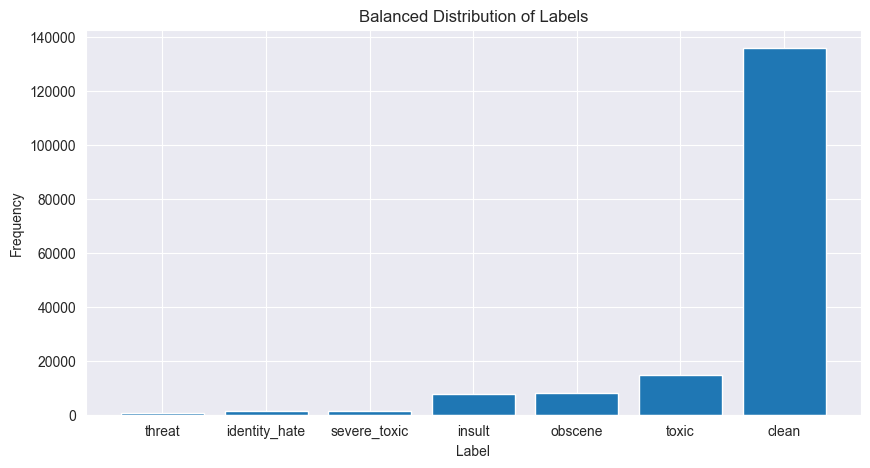

In [11]:
# Reload the saved data to not lose progress
# df = pd.read_csv("resampled_data.csv")

# SAMPLE_SIZE = 17500
# unclean_df = df[df["clean"] == 0]
# clean_df = df[df["clean"] == 1]
# clean_df = clean_df.sample(n=SAMPLE_SIZE, random_state=42)
# 
# df = pd.concat([unclean_df, clean_df], ignore_index=True)

# Sorted label distribution
categories = np.array(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "clean"])
frequencies = df[categories].sum()

sorted_indicies = np.argsort(frequencies)
frequencies = frequencies[sorted_indicies]
categories = categories[sorted_indicies]

plt.figure(figsize=(10, 5))
plt.bar(categories, frequencies)
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Balanced Distribution of Labels")
plt.show()

## Character cleaning and Lemmatization

In [12]:
import re
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("wordnet")
nltk.download("stopwords")

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

# Regular expression for url
url_pattern = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.?[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
# Regular expression for non-alphanumeric characters
non_alphanumeric_pattern = r"[^a-zA-Z0-9\s]"

def clean(text):
    # Cleaning
    text = text.lower()
    text = re.sub(url_pattern, " url ", text)
    text = re.sub(non_alphanumeric_pattern, "", text)
    
    # Remove stopwords
    words = [word for word in text.split() if word not in stopwords]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    result = " ".join([lemmatizer.lemmatize(token, pos="n") for token in words])
    
    return result

df["comment_text"] = df["comment_text"].apply(lambda x: clean(x))
df.drop(["comment_length", "num_toxicity_labels"], axis=1, inplace=True)
df = df[df["comment_text"].str.len() > 3]
df.to_csv("cleaned_data.csv")


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yumengliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yumengliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Preparing test data
df_test = pd.read_csv("test.csv")
df_test_targets = pd.read_csv("test_labels.csv")
df_test_merged = df_test.set_index("id").join(df_test_targets.set_index("id"))
df_test_merged = df_test_merged[(df_test_merged != -1).all(axis=1)]
df_test_merged["comment_text"] = df_test_merged["comment_text"].apply(clean)
df_test_merged.fillna("placeholder")
df_test_merged.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0001ea8717f6de06,thank understanding think highly would revert ...,0,0,0,0,0,0
000247e83dcc1211,dear god site horrible,0,0,0,0,0,0
0002f87b16116a7f,somebody invariably try add religion really me...,0,0,0,0,0,0
0003e1cccfd5a40a,say right type type institution needed case th...,0,0,0,0,0,0
00059ace3e3e9a53,adding new product list make sure relevant add...,0,0,0,0,0,0


In [14]:
df_test_merged.to_csv("cleaned_test_data.csv")

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

seed = 1234
np.random.seed(seed)

In [16]:
df = pd.read_csv('cleaned_data.csv')
df = df.sample(frac=1).reset_index(drop=True)
categories = np.array(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"])
X_train, y_train = df['comment_text'].values, df[categories].values.astype(int)
X_train.shape, y_train.shape

((151528,), (151528, 6))

In [17]:
df_test = pd.read_csv("cleaned_test_data.csv")
X_test, y_test = df_test['comment_text'].values, df_test[categories].values.astype(int)
X_test.shape, y_test.shape

MAX_FEATURES = 5000
MAX_LENGTH = 1400

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=MAX_FEATURES,
                             min_df=3, max_df=0.9, use_idf=True,
                             smooth_idf=True, sublinear_tf=True)

X_train = vectorizer.fit_transform(X_train.astype(str))
X_test = vectorizer.transform(X_test.astype(str))

# Model Training

In [18]:
from sklearn.metrics import (
    hamming_loss,
    roc_auc_score,
    balanced_accuracy_score,
    f1_score
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from time import time
import warnings

warnings.filterwarnings('ignore')

result = []


def calculate_col_avg_auc(y_true, y_pred):
    col_count = y_true.shape[1]
    return sum(roc_auc_score(y_test[:, col], y_pred[:, col]) for col in range(col_count)) / col_count


def calculate_mean_balanced_acc(y_true, y_pred):
    col_count = y_true.shape[1]
    return sum(balanced_accuracy_score(y_test[:, col], y_pred[:, col]) for col in range(col_count)) / col_count

## Multinomial

In [19]:
start_time = time()
classifier = MultiOutputClassifier(MultinomialNB())
classifier.fit(X_train, y_train)
end_time = time()

y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba = np.array(y_pred_proba)
y_pred_proba = y_pred_proba[:, :, 1].T

y_pred = classifier.predict(X_test)

row_dict = {}
row_dict["Type"] = "Multinomial"
row_dict["Hamming Loss"] = hamming_loss(y_test, y_pred)
row_dict["ROC AUC"] = calculate_col_avg_auc(y_test, y_pred_proba)
row_dict["Mean Balanced Accuracy"] = calculate_mean_balanced_acc(y_test, y_pred)
row_dict["F1 micro"] = f1_score(y_test, y_pred, average="micro")
row_dict["Training Time"] = end_time - start_time

result.append(row_dict)
row_dict

{'Type': 'Multinomial',
 'Hamming Loss': 0.026524742880365125,
 'ROC AUC': np.float64(0.9556623487380671),
 'Mean Balanced Accuracy': np.float64(0.6616888277841178),
 'F1 micro': 0.5864337936636881,
 'Training Time': 0.07314181327819824}

## Decision Tree

In [20]:
from sklearn.ensemble import RandomForestClassifier

row_dict = {}
y_pred = []
y_pred_proba = []
classifiers = []

start_time = time()
for col in range(y_test.shape[1]):
    classifier = RandomForestClassifier(
        max_depth=100,
        n_estimators=120,
        min_samples_leaf=3,
        criterion="entropy",
        random_state=seed
    )

    classifier.fit(X_train, y_train[:, col])
    classifiers.append(classifier)

end_time = time()

for classifier in classifiers:
    yi_pred = classifier.predict(X_test)
    yi_pred_proba = classifier.predict_proba(X_test)
    yi_pred_proba = yi_pred_proba[:, 1]

    y_pred.append(yi_pred)
    y_pred_proba.append(yi_pred_proba)

y_pred = np.array(y_pred).T
y_pred_proba = np.array(y_pred_proba).T

row_dict["Type"] = "Random Decision Forrest"
row_dict["Hamming Loss"] = hamming_loss(y_test, y_pred)
row_dict["ROC AUC"] = calculate_col_avg_auc(y_test, y_pred_proba)
row_dict["Mean Balanced Accuracy"] = calculate_mean_balanced_acc(y_test, y_pred)
row_dict["F1 micro"] = f1_score(y_test, y_pred, average="micro")
row_dict["Training Time"] = end_time - start_time

result.append(row_dict)
row_dict

{'Type': 'Random Decision Forrest',
 'Hamming Loss': 0.025698938176664896,
 'ROC AUC': np.float64(0.9635873612480409),
 'Mean Balanced Accuracy': np.float64(0.6334086452368891),
 'F1 micro': 0.599097817694152,
 'Training Time': 162.1959719657898}

## Logstic Regression

In [21]:
from sklearn.linear_model import SGDClassifier

row_dict = {}
y_pred = []
y_pred_proba = []
classifiers = []

start_time = time()

for col in range(y_test.shape[1]):
    classifier = SGDClassifier(
        loss='log_loss',
        penalty='l2', alpha=1e-20,
        learning_rate='adaptive', eta0=1e-2,
        tol=0., max_iter=1000, n_iter_no_change=1000,
        random_state=seed
    )

    classifier.fit(X_train, y_train[:, col])
    classifiers.append(classifier)

end_time = time()

for classifier in classifiers:
    yi_pred = classifier.predict(X_test)
    yi_pred_proba = classifier.predict_proba(X_test)
    yi_pred_proba = yi_pred_proba[:, 1]

    y_pred.append(yi_pred)
    y_pred_proba.append(yi_pred_proba)

y_pred = np.array(y_pred).T
y_pred_proba = np.array(y_pred_proba).T

row_dict["Type"] = "Logistic Regression"
row_dict["Hamming Loss"] = hamming_loss(y_test, y_pred)
row_dict["ROC AUC"] = calculate_col_avg_auc(y_test, y_pred_proba)
row_dict["Mean Balanced Accuracy"] = calculate_mean_balanced_acc(y_test, y_pred)
row_dict["F1 micro"] = f1_score(y_test, y_pred, average="micro")
row_dict["Training Time"] = end_time - start_time

result.append(row_dict)
row_dict

{'Type': 'Logistic Regression',
 'Hamming Loss': 0.0288510633863724,
 'ROC AUC': np.float64(0.9581336460093767),
 'Mean Balanced Accuracy': np.float64(0.7514402815909064),
 'F1 micro': 0.6379180697682022,
 'Training Time': 127.8353841304779}

## MLP

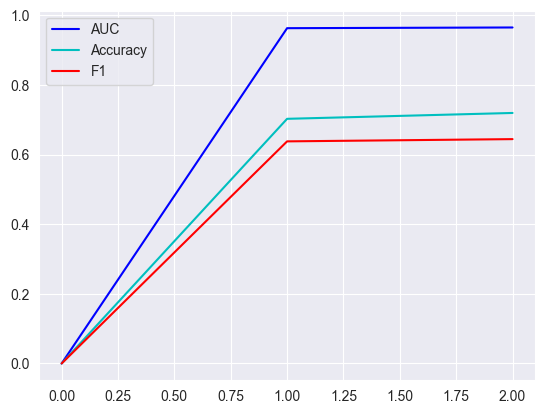

{'Type': 'MLP',
 'Hamming Loss': 0.02800702324757469,
 'ROC AUC': np.float64(0.9648554756891455),
 'Mean Balanced Accuracy': np.float64(0.7193835789899242),
 'F1 micro': 0.6442539955659972,
 'Training Time': 14.752037763595581}

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from IPython import display
from matplotlib import pyplot as plt

torch.manual_seed(seed)


class ToxicCommentDataset(Dataset):
    def __init__(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()
        self._n_samples = len(X)

    def __len__(self):
        return self._n_samples

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


if type(X_train) is not np.ndarray:
    X_train = X_train.toarray()
    X_test = X_test.toarray()

train_dataset = ToxicCommentDataset(X_train, y_train)
val_dataset = ToxicCommentDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=10, shuffle=False)


class MLP(nn.Module):
    def __init__(self, layers):
        super(MLP, self).__init__()
        self._model = nn.Sequential(*layers)

    def forward(self, x):
        return self._model(x)


layers = [
    nn.Linear(MAX_FEATURES, 27),
    nn.ReLU(),
    nn.Linear(27, 6),
    nn.Sigmoid()
]

model = MLP(layers)

criterion = nn.BCELoss(reduction="sum")
optimizer = optim.Adam(model.parameters(), lr=0.001)

auc_scores = [0]
f1_scores = [0]
mean_accuracy_scores = [0]

EPOCH = 2
start_time = time()

for epoch in range(EPOCH):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    val_loss = 0
    model.eval()

    y_pred_proba = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            y_pred_proba.extend(outputs.detach().numpy())

    y_pred_proba = np.array(y_pred_proba)
    y_pred = [[0 if col < 0.5 else 1 for col in row] for row in y_pred_proba]
    y_pred = np.array(y_pred)

    auc_scores.append(calculate_col_avg_auc(y_test, y_pred_proba))
    mean_accuracy_scores.append(calculate_mean_balanced_acc(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))

    display.clear_output(wait=True)
    plt.plot(
        range(epoch + 2), auc_scores, 'b-',
        range(epoch + 2), mean_accuracy_scores, 'c-',
        range(epoch + 2), f1_scores, 'r-',
    )
    plt.legend(["AUC", "Accuracy", "F1"])
    plt.draw()
    plt.pause(.01)

end_time = time()

# Eval
y_pred_proba = []
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        y_pred_proba.extend(outputs.detach().numpy())

y_pred_proba = np.array(y_pred_proba)
y_pred = [[0 if col < 0.5 else 1 for col in row] for row in y_pred_proba]
y_pred = np.array(y_pred)

row_dict = {}
row_dict["Type"] = "MLP"
row_dict["Hamming Loss"] = hamming_loss(y_test, y_pred)
row_dict["ROC AUC"] = calculate_col_avg_auc(y_test, y_pred_proba)
row_dict["Mean Balanced Accuracy"] = calculate_mean_balanced_acc(y_test, y_pred)
row_dict["F1 micro"] = f1_score(y_test, y_pred, average="micro")
row_dict["Training Time"] = end_time - start_time
result.append(row_dict)
row_dict

In [23]:
## Result
pd.DataFrame.from_dict(result)

,Type,Hamming Loss,ROC AUC,Mean Balanced Accuracy,F1 micro,Training Time
0,Multinomial,0.026525,0.955662,0.661689,0.586434,0.073142
1,Random Decision Forrest,0.025699,0.963587,0.633409,0.599098,162.195972
2,Logistic Regression,0.028851,0.958134,0.751440,0.637918,127.835384
3,MLP,0.028007,0.964855,0.719384,0.644254,14.752038


## Conclusion
MLP model is the best
